In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

import pandas as pd
import numpy as np

# Question 1

In [105]:
data = np.array(pd.read_csv('pendigits.tra', sep=",", header=None))
#We didn't include the target variable
pca_data = data[:,:16]

In [55]:
data_fashion_mnist = pd.read_csv('HW#3/fashion-mnist_train.csv',sep=',')

In [3]:
def PCA(data , num_components):
     
    data=data/np.std(data, axis=0)
    data=data-np.mean(data, axis=0)
    eigen_values , eigen_vectors = np.linalg.eigh(np.cov(data,rowvar = False))
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    data_final = np.dot(eigenvector_subset.transpose() , data.transpose() ).transpose()
    
    return data_final

In [4]:
red_data_2_comp = PCA(pca_data,2)

In [5]:
red_data_2_comp

array([[-3.20288186, -1.56411521],
       [ 1.04313515, -2.02430637],
       [ 1.98877285,  2.58471801],
       ...,
       [ 1.2657052 , -0.51121672],
       [ 2.91722087, -2.03790623],
       [ 1.42913624, -1.8202609 ]])

In [6]:
red_data_3_comp = PCA(pca_data,3)

# Plots for pendigits

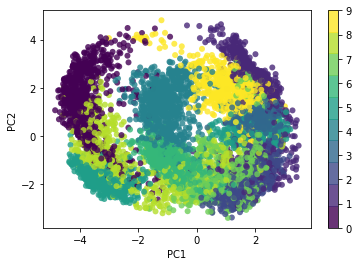

In [109]:
plt.scatter(red_data_2_comp[:,0],red_data_2_comp[:,1],c=data[:,16], edgecolor='none',alpha=0.8,cmap=plt.cm.get_cmap('viridis',10))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()

/z/home/fb006652/environment/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


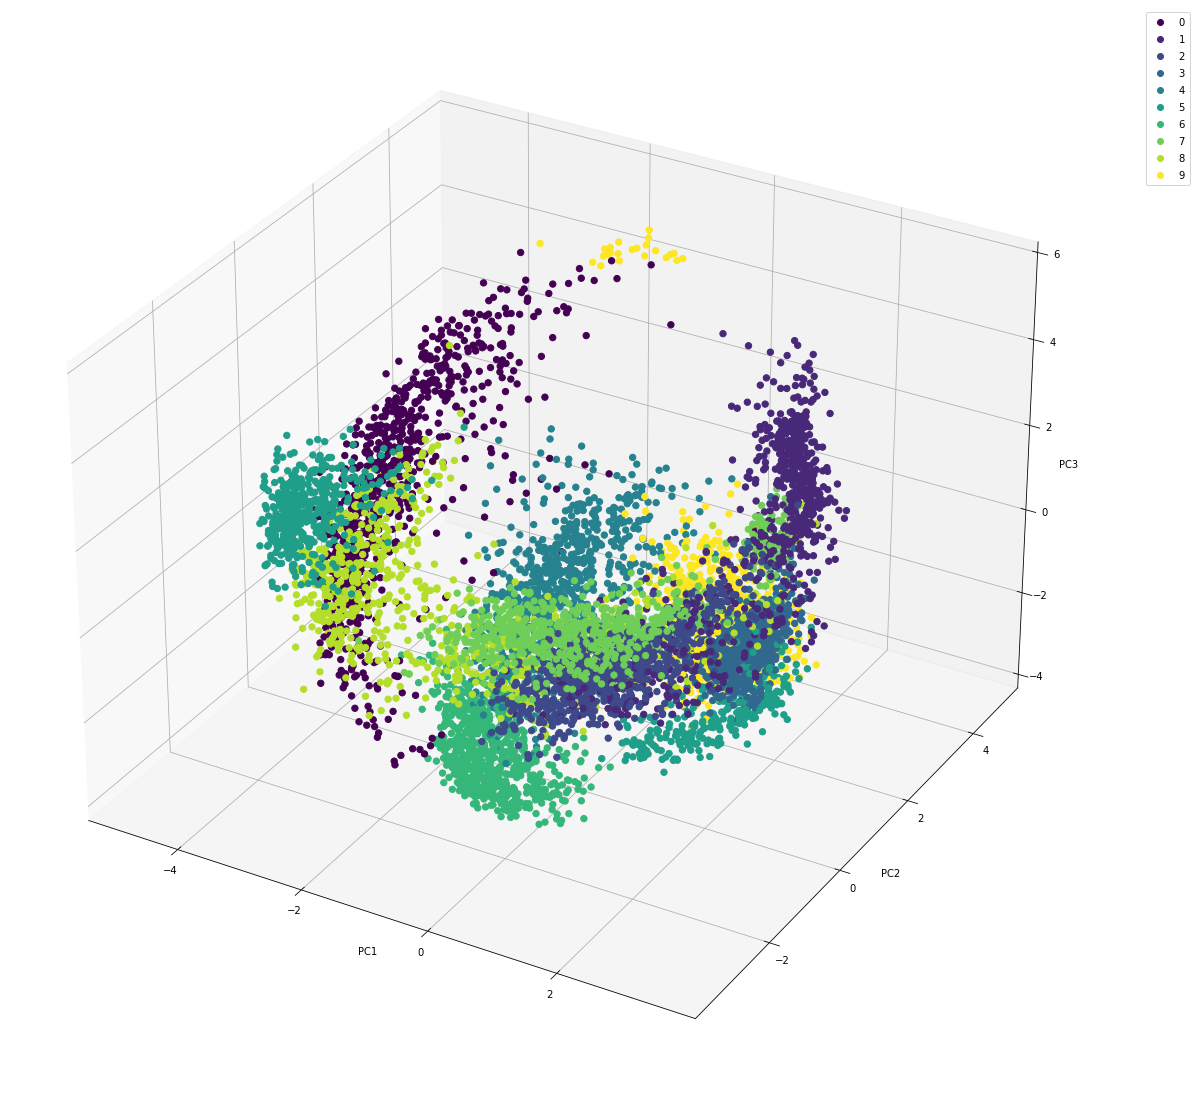

In [110]:
# axes instance
fig = plt.figure(figsize=(15,15))
ax = Axes3D(fig)
fig.add_axes(ax)

# plot
sc = ax.scatter(red_data_3_comp[:,0], red_data_3_comp[:,1], red_data_3_comp[:,2], s=40, c=data[:,16], marker='o', cmap=plt.cm.get_cmap('viridis',10), alpha=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')

# Plots for fashion_mnist

In [96]:
x_mnist_fashion = np.array(data_fashion_mnist.iloc[:,1:])
y_mnist_fashion = np.array(data_fashion_mnist.iloc[:,0])

In [97]:
indexes = ~np.isnan(x_mnist_fashion).any(axis=1)
x_mnist_fashion = x_mnist_fashion[indexes, :]
y_mnist_fashion = y_mnist_fashion[indexes]

In [76]:
mnist_fashion_2 = PCA(x_mnist_fashion,2)

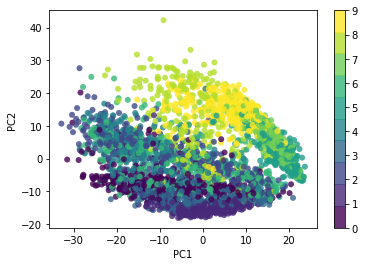

In [98]:
plt.scatter(mnist_fashion_2[:,0],mnist_fashion_2[:,1],c=y_mnist_fashion, edgecolor='none',alpha=0.8,cmap=plt.cm.get_cmap('viridis',10))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()

In [107]:
mnist_fashion_3 = PCA(x_mnist_fashion,3)

/z/home/fb006652/environment/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


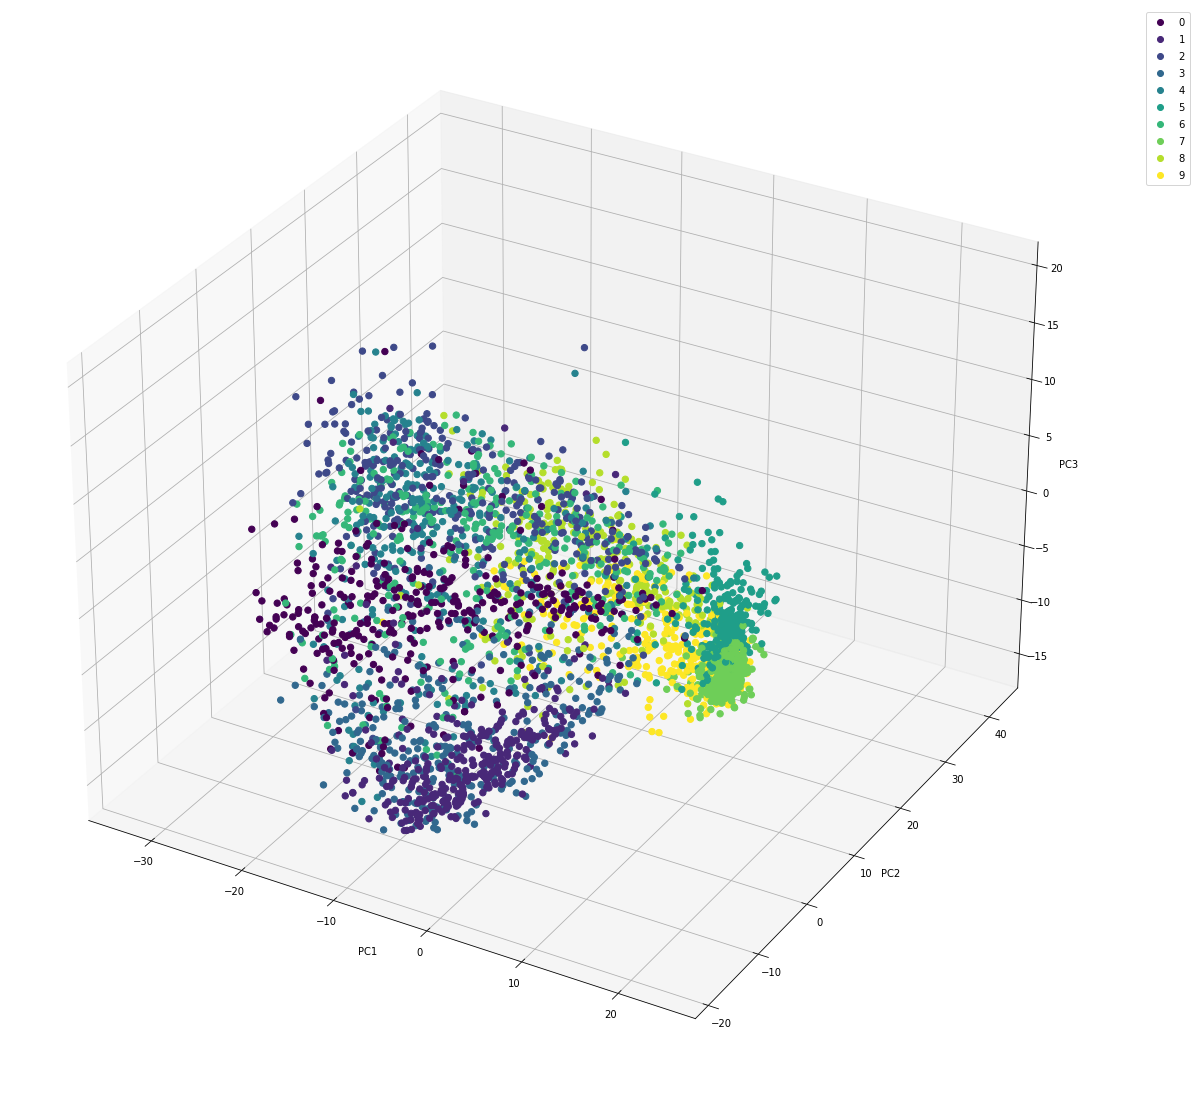

In [111]:
# axes instance
fig = plt.figure(figsize=(15,15))
ax = Axes3D(fig)
fig.add_axes(ax)

# plot
sc = ax.scatter(mnist_fashion_3[:,0], mnist_fashion_3[:,1], mnist_fashion_3[:,2], s=40, c=y_mnist_fashion, marker='o', cmap=plt.cm.get_cmap('viridis',10), alpha=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')

# Proportion Of Variance for pendigits

In [9]:
pca_data=pca_data/np.std(pca_data, axis=0)
pca_data=pca_data-np.mean(pca_data, axis=0)
eigen_values , eigen_vectors = np.linalg.eigh(np.cov(pca_data,rowvar = False))
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvalue

array([4.67864004, 3.19166504, 2.64062166, 1.19773793, 1.07915935,
       0.79553253, 0.60303166, 0.53985646, 0.43522448, 0.30402793,
       0.21795959, 0.11640495, 0.07929789, 0.06008674, 0.03401293,
       0.02887615])

In [11]:
prop_var = pd.DataFrame(np.cumsum(sorted_eigenvalue) / sorted_eigenvalue.sum() * 100).reset_index()

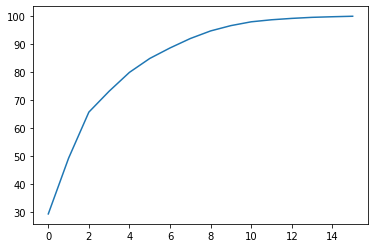

In [116]:
plt.plot(prop_var[0])

From the %90 percent threshold we have 6-7 variables.

# Proportion Of Variance for fashion_mnist

In [117]:
pca_data = x_mnist_fashion
pca_data=pca_data/np.std(pca_data, axis=0)
pca_data=pca_data-np.mean(pca_data, axis=0)
eigen_values , eigen_vectors = np.linalg.eigh(np.cov(pca_data,rowvar = False))
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvalue

array([1.71599965e+02, 1.11835601e+02, 4.39279232e+01, 4.03052141e+01,
       3.16185118e+01, 2.42568529e+01, 2.18601603e+01, 1.83971133e+01,
       1.33275722e+01, 1.01805945e+01, 9.62178377e+00, 7.63550617e+00,
       7.36951478e+00, 6.85456260e+00, 6.08935459e+00, 5.82661184e+00,
       5.36890755e+00, 5.18666112e+00, 5.10196029e+00, 4.77576208e+00,
       4.60804708e+00, 4.35748455e+00, 4.11923959e+00, 3.90621437e+00,
       3.61973847e+00, 3.52433415e+00, 3.35796617e+00, 3.29065451e+00,
       3.18179410e+00, 3.08343340e+00, 3.02575387e+00, 2.88880292e+00,
       2.86456179e+00, 2.72806078e+00, 2.68520012e+00, 2.58480522e+00,
       2.52893290e+00, 2.46191716e+00, 2.34794392e+00, 2.31945806e+00,
       2.25923779e+00, 2.22479179e+00, 2.12580969e+00, 2.08971121e+00,
       2.07376740e+00, 1.99142396e+00, 1.89538461e+00, 1.86621008e+00,
       1.81624240e+00, 1.76128828e+00, 1.71333296e+00, 1.68280714e+00,
       1.65399813e+00, 1.61179058e+00, 1.56505116e+00, 1.56364974e+00,
      

In [118]:
prop_var = pd.DataFrame(np.cumsum(sorted_eigenvalue) / sorted_eigenvalue.sum() * 100).reset_index()

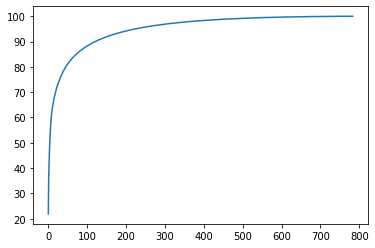

In [119]:
plt.plot(prop_var[0])

From the %90 percent threshold we have 100 variables.

# Question 2

## pendigits

In [121]:
X = data[:,:16]
y = data[:,16]

In [15]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
target_labels = np.unique(y)

In [17]:
def LDA(X, y , num_components):
     
    X=X/np.std(X, axis=0)
    data=X-np.mean(X, axis=0)
    
    column_number = data.shape[1]
    target_labels = np.unique(y)
    
    sw = np.zeros((column_number,column_number))
    sb = np.zeros((column_number,column_number))
    
    total_mean = np.mean(data,axis=0)
    
    for label in target_labels:
        X_class = data[y==label]
        class_mean = np.mean(X_class,axis=0)
        sw = sw + (X_class - class_mean).T.dot(X_class - class_mean)
        num_class_row = X_class.shape[0]
        mean_diff = (class_mean - total_mean).reshape(column_number,1)
        sb = sb + (num_class_row * (mean_diff).dot(mean_diff.T))
    
    eigen_values , eigen_vectors = np.linalg.eig(np.linalg.inv(sw).dot(sb))
    eigen_vectors = eigen_vectors.T
    sorted_index = np.argsort(abs(eigen_values))[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[sorted_index]
    eigenvector_subset = sorted_eigenvectors[0:num_components]
    
    data_final = np.dot(data, eigenvector_subset.T)
    
    return data_final

In [18]:
X_proj = LDA(X, y , 2)
x1 = X_proj[:,0]
x2 = X_proj[:,1]

# Plots for pendigits

/z/home/fb006652/environment/lib/python3.6/site-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


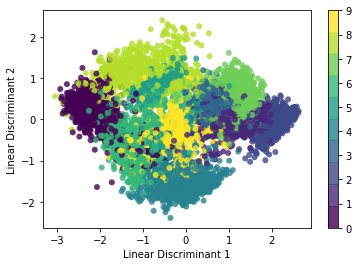

In [19]:
plt.scatter(x1,x2,c=y, edgecolor='none',alpha=0.8,cmap=plt.cm.get_cmap('viridis',10))
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.colorbar()

In [122]:
X_proj = LDA(X, y , 3)

/z/home/fb006652/environment/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


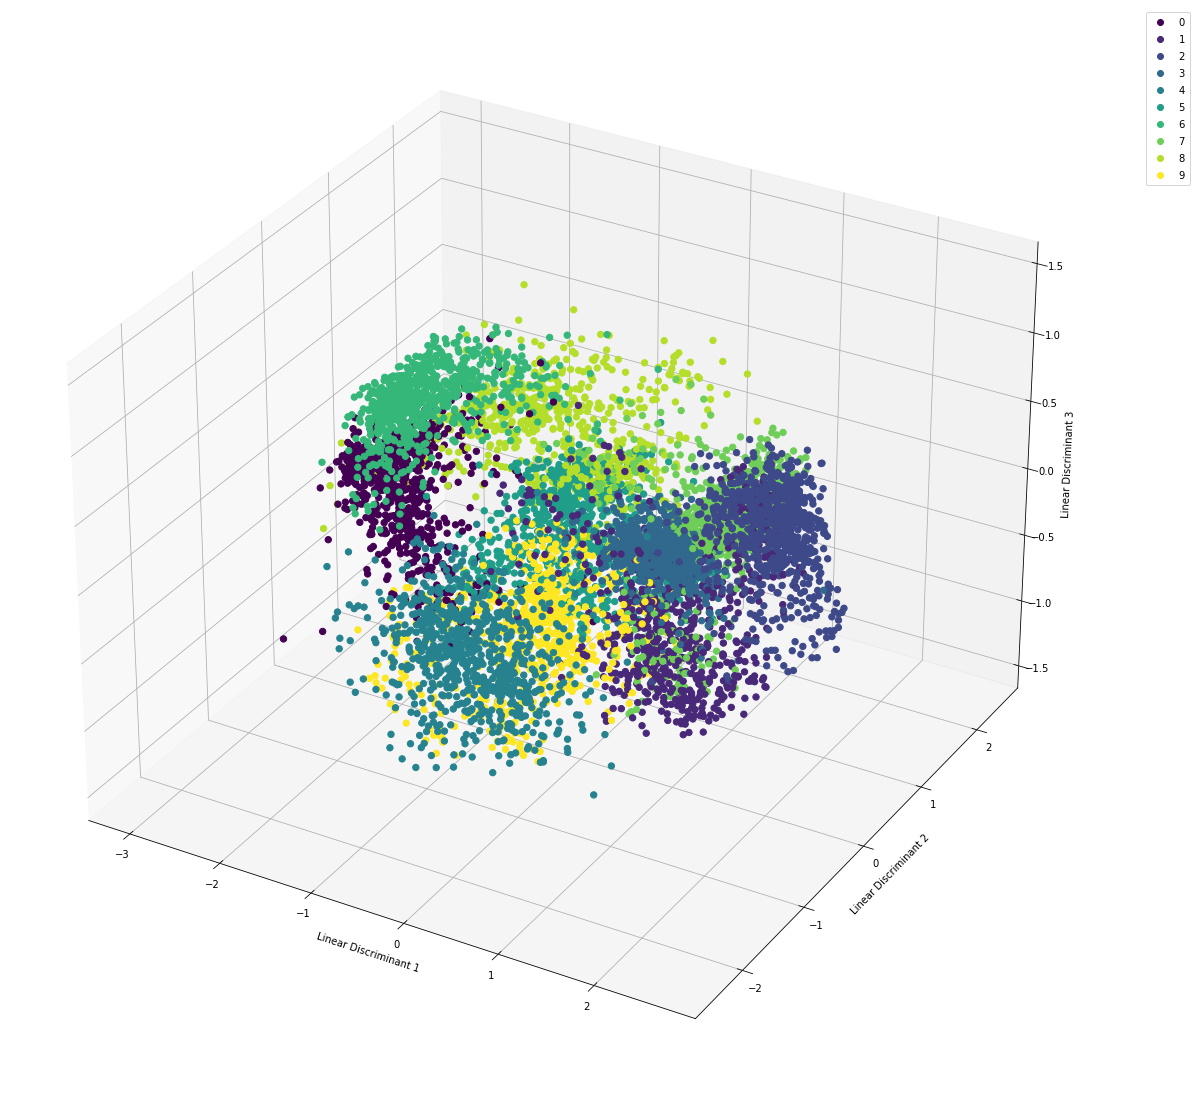

In [124]:
# axes instance
fig = plt.figure(figsize=(15,15))
ax = Axes3D(fig)
fig.add_axes(ax)

# plot
sc = ax.scatter(X_proj[:,0], X_proj[:,1], X_proj[:,2], s=40, c=y, marker='o', cmap=plt.cm.get_cmap('viridis',10), alpha=1)
ax.set_xlabel('Linear Discriminant 1')
ax.set_ylabel('Linear Discriminant 2')
ax.set_zlabel('Linear Discriminant 3')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')

# Plots for fashion_mnist

In [100]:
X_proj = LDA(x_mnist_fashion, y_mnist_fashion , 2)
x1 = X_proj[:,0]
x2 = X_proj[:,1]

/z/home/fb006652/environment/lib/python3.6/site-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


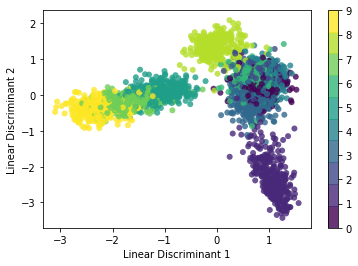

In [101]:
plt.scatter(x1,x2,c=y_mnist_fashion, edgecolor='none',alpha=0.8,cmap=plt.cm.get_cmap('viridis',10))
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.colorbar()

In [125]:
X_proj = LDA(x_mnist_fashion, y_mnist_fashion , 3)

/z/home/fb006652/environment/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


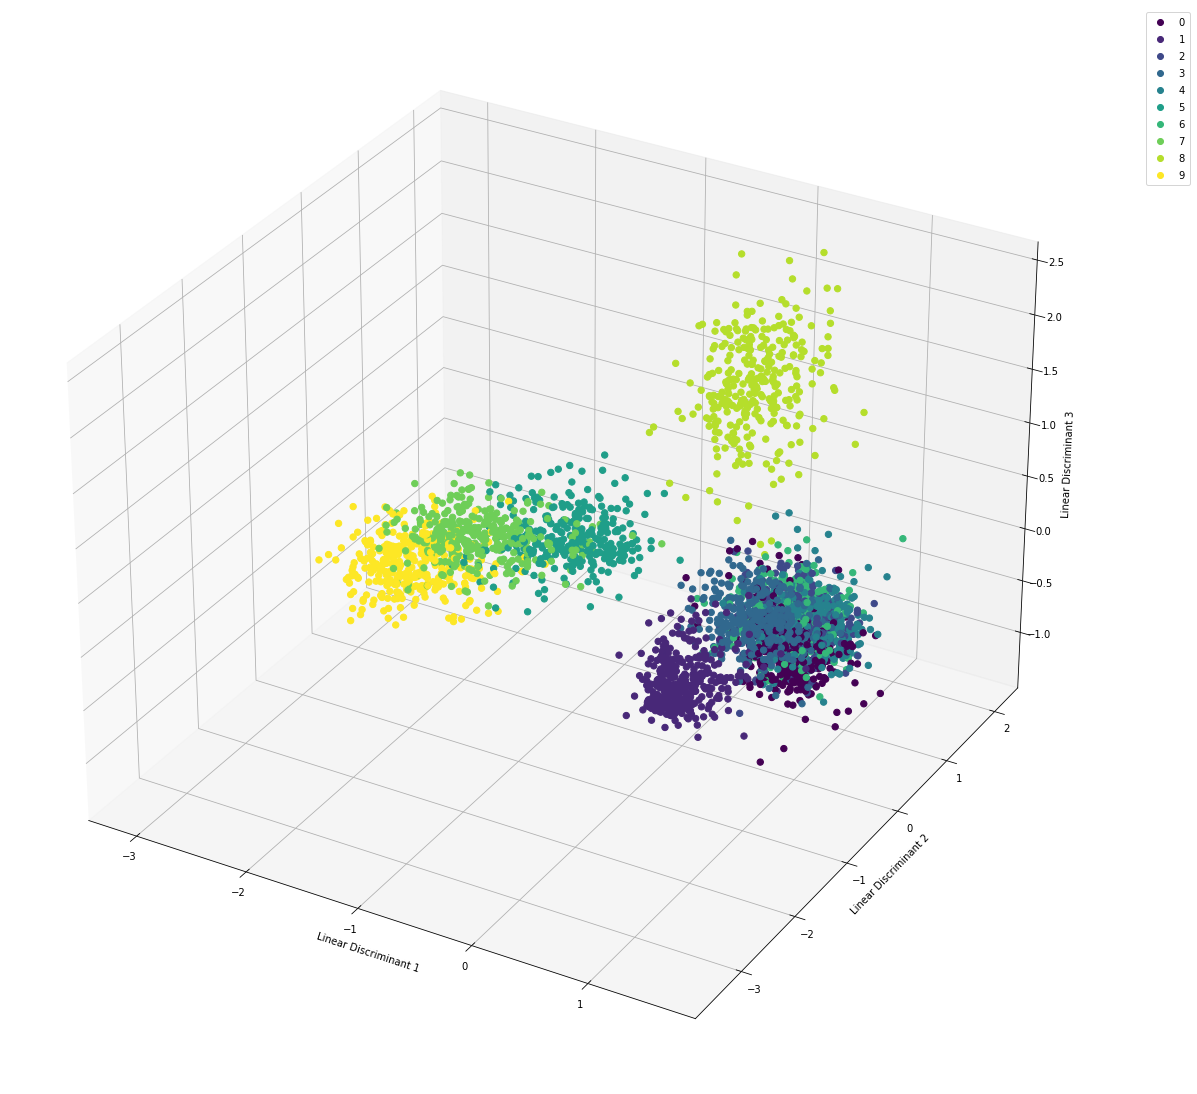

In [126]:
# axes instance
fig = plt.figure(figsize=(15,15))
ax = Axes3D(fig)
fig.add_axes(ax)

# plot
sc = ax.scatter(X_proj[:,0], X_proj[:,1], X_proj[:,2], s=40, c=y_mnist_fashion, marker='o', cmap=plt.cm.get_cmap('viridis',10), alpha=1)
ax.set_xlabel('Linear Discriminant 1')
ax.set_ylabel('Linear Discriminant 2')
ax.set_zlabel('Linear Discriminant 3')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')

# Question 3

(7494, 2)


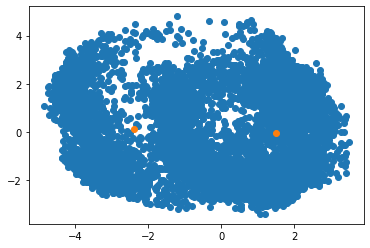

In [127]:
def update_assignments(data, centroids):
    c = []
    for i in data:
        c.append(np.argmin(np.sum((i.reshape((1, 2)) - centroids) ** 2, axis=1)))
    return c

def update_centroids(data, num_clusters, assignments):
    cen = []
    for c in range(len(num_clusters)):
        cen.append(np.mean([data[x] for x in range(len(data)) if assignments[x] == c], axis=0))
    return cen

data = red_data_2_comp
print(data.shape)

centroids = (np.random.normal(size=(2, 2)) * 0.0001) + np.mean(data, axis=0).reshape((1, 2))
for i in range(100):
    a = update_assignments(data, centroids)
    centroids = update_centroids(data, centroids, a)
    centroids = np.array(centroids)

plt.scatter(red_data_2_comp[:, 0], red_data_2_comp[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1])
plt.show()

In [183]:
distances = [np.linalg.norm(red_data_2_comp-centroid) for centroid in centroids]
classification = distances.index(min(distances))
distance_to_first_center = [np.linalg.norm(red_data_2_comp[i,:] - centroids[0,:]) for i in  range(red_data_2_comp.shape[0])]
distance_to_second_center = [np.linalg.norm(red_data_2_comp[i,:] - centroids[1,:]) for i in  range(red_data_2_comp.shape[0])]
cluster = [0 if min(l1, l2)==l1 else 1 for l1, l2 in list(zip(distance_to_first_center, distance_to_second_center))]

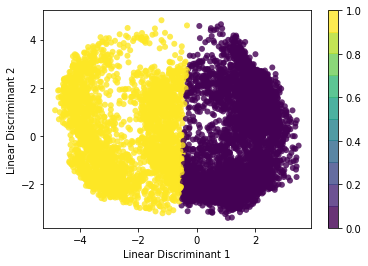

In [184]:
plt.scatter(red_data_2_comp[:, 0], red_data_2_comp[:, 1],c=cluster, edgecolor='none',alpha=0.8,cmap=plt.cm.get_cmap('viridis',10))
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.colorbar()

(7494, 2)


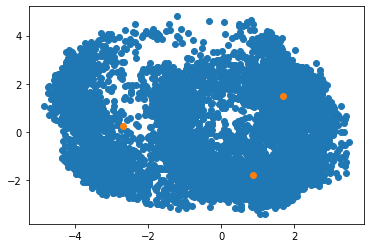

In [200]:
def update_assignments(data, centroids):
    c = []
    for i in data:
        c.append(np.argmin(np.sum((i.reshape((1, 2)) - centroids) ** 2, axis=1)))
    return c

def update_centroids(data, num_clusters, assignments):
    cen = []
    for c in range(len(num_clusters)):
        cen.append(np.mean([data[x] for x in range(len(data)) if assignments[x] == c], axis=0))
    return cen

data = red_data_2_comp
print(data.shape)

centroids = (np.random.normal(size=(3, 2)) * 0.0001) + np.mean(data, axis=0).reshape((1, 2))
for i in range(100):
    a = update_assignments(data, centroids)
    centroids = update_centroids(data, centroids, a)
    centroids = np.array(centroids)

plt.scatter(red_data_2_comp[:, 0], red_data_2_comp[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1])
plt.show()

In [202]:
distances = [np.linalg.norm(red_data_2_comp-centroid) for centroid in centroids]
classification = distances.index(min(distances))
distance_to_first_center = [np.linalg.norm(red_data_2_comp[i,:] - centroids[0,:]) for i in  range(red_data_2_comp.shape[0])]
distance_to_second_center = [np.linalg.norm(red_data_2_comp[i,:] - centroids[1,:]) for i in  range(red_data_2_comp.shape[0])]
distance_to_third_center = [np.linalg.norm(red_data_2_comp[i,:] - centroids[2,:]) for i in  range(red_data_2_comp.shape[0])]

In [203]:
cluster = []
for l1, l2, l3 in list(zip(distance_to_first_center, distance_to_second_center,distance_to_third_center)):
    if min(l1, l2, l3)==l1:
        cluster.append(0)
    elif min(l1, l2, l3)==l2:
        cluster.append(1)     
    else:
        cluster.append(2)                       

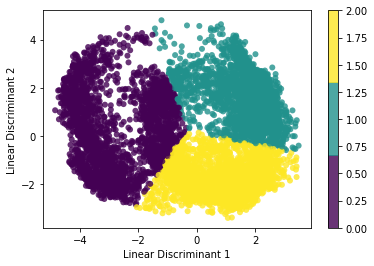

In [205]:
plt.scatter(red_data_2_comp[:, 0], red_data_2_comp[:, 1],c=cluster, edgecolor='none',alpha=0.8,cmap=plt.cm.get_cmap('viridis',3))
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.colorbar()

(7494, 2)


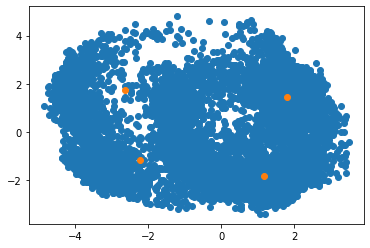

In [206]:
def update_assignments(data, centroids):
    c = []
    for i in data:
        c.append(np.argmin(np.sum((i.reshape((1, 2)) - centroids) ** 2, axis=1)))
    return c

def update_centroids(data, num_clusters, assignments):
    cen = []
    for c in range(len(num_clusters)):
        cen.append(np.mean([data[x] for x in range(len(data)) if assignments[x] == c], axis=0))
    return cen

data = red_data_2_comp
print(data.shape)

centroids = (np.random.normal(size=(4, 2)) * 0.0001) + np.mean(data, axis=0).reshape((1, 2))
for i in range(100):
    a = update_assignments(data, centroids)
    centroids = update_centroids(data, centroids, a)
    centroids = np.array(centroids)

plt.scatter(red_data_2_comp[:, 0], red_data_2_comp[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1])
plt.show()

In [207]:
distances = [np.linalg.norm(red_data_2_comp-centroid) for centroid in centroids]
classification = distances.index(min(distances))
distance_to_first_center = [np.linalg.norm(red_data_2_comp[i,:] - centroids[0,:]) for i in  range(red_data_2_comp.shape[0])]
distance_to_second_center = [np.linalg.norm(red_data_2_comp[i,:] - centroids[1,:]) for i in  range(red_data_2_comp.shape[0])]
distance_to_third_center = [np.linalg.norm(red_data_2_comp[i,:] - centroids[2,:]) for i in  range(red_data_2_comp.shape[0])]
distance_to_fourth_center = [np.linalg.norm(red_data_2_comp[i,:] - centroids[3,:]) for i in  range(red_data_2_comp.shape[0])]

In [216]:
cluster = []
for l1, l2, l3, l4 in list(zip(distance_to_first_center, distance_to_second_center,distance_to_third_center,distance_to_fourth_center)):
    if min(l1, l2, l3,l4)==l1:
        cluster.append(0)
    elif min(l1, l2, l3,l4)==l2:
        cluster.append(1)     
    elif min(l1, l2, l3,l4)==l3:
        cluster.append(2)             
    else:
        cluster.append(3)  

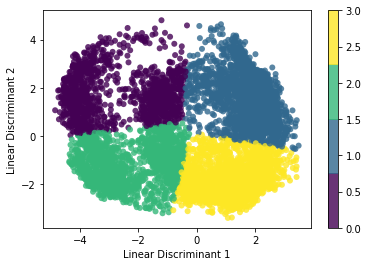

In [217]:
plt.scatter(red_data_2_comp[:, 0], red_data_2_comp[:, 1],c=cluster, edgecolor='none',alpha=0.8,cmap=plt.cm.get_cmap('viridis',4))
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.colorbar()